# Part II - (Ford GoBike Visualizations and Insights)
## by (Gharam Aljohani)



## Investigation Overview


>The presentation shows the most useful type, who of the user gender finish the trip faster, and what are the days of the trip



## Dataset Overview

> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

In [17]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [18]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('Clean_GoBike.csv')
df

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_birth_year,member_gender,bike_share_for_all_trip,age,start_day,start_month,end_day,end_month,start_hr,end_hr
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,1984.0,Male,No,35.0,Thursday,February,Friday,March,17,8
1,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,1972.0,Male,No,47.0,Thursday,February,Friday,March,12,5
2,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,1974.0,Male,Yes,45.0,Thursday,February,Friday,March,23,0
3,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,1959.0,Male,No,60.0,Thursday,February,Friday,March,23,0
4,1147,2019-02-28 23:55:35.104,2019-03-01 00:14:42.588,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,...,1983.0,Female,No,36.0,Thursday,February,Friday,March,23,0
5,1615,2019-02-28 23:41:06.766,2019-03-01 00:08:02.756,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,...,1989.0,Male,No,30.0,Thursday,February,Friday,March,23,0
6,1049,2019-02-28 23:49:47.699,2019-03-01 00:07:17.025,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,...,1992.0,Male,No,27.0,Thursday,February,Friday,March,23,0
7,458,2019-02-28 23:57:57.211,2019-03-01 00:05:35.435,370.0,Jones St at Post St,37.787327,-122.413278,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,...,1996.0,Female,Yes,23.0,Thursday,February,Friday,March,23,0
8,506,2019-02-28 23:56:55.540,2019-03-01 00:05:21.733,44.0,Civic Center/UN Plaza BART Station (Market St ...,37.781074,-122.411738,343.0,Bryant St at 2nd St,37.783172,...,1993.0,Male,No,26.0,Thursday,February,Friday,March,23,0
9,1176,2019-02-28 23:45:12.651,2019-03-01 00:04:49.184,127.0,Valencia St at 21st St,37.756708,-122.421025,323.0,Broadway at Kearny,37.798014,...,1990.0,Male,No,29.0,Thursday,February,Friday,March,23,0


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## What are the most user type?

> The chart shows the most user type in our database is (Subscribers)

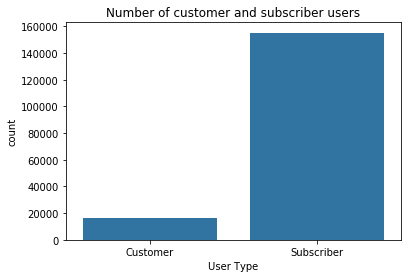

In [19]:
defult_color= sb.color_palette()[0]
sb.countplot(data= df,x='user_type', color=defult_color);
plt.xlabel('User Type');
plt.title('Number of customer and subscriber users');

## What are the most user gender?

> The chart shows the male are the most user 

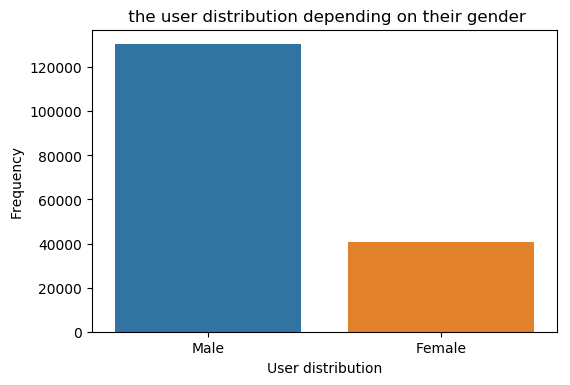

In [20]:
plt.figure(figsize = (6,4), dpi = 100);
plot = sb.countplot(data=df, x='member_gender');
plt.xlabel('User distribution');
plt.ylabel('Frequency');
plt.title(" the user distribution depending on their gender");
plt.show();

## What are the most gender depend on user type?
> The chart shows the most of the user as we see is subscriber and most of them are male 


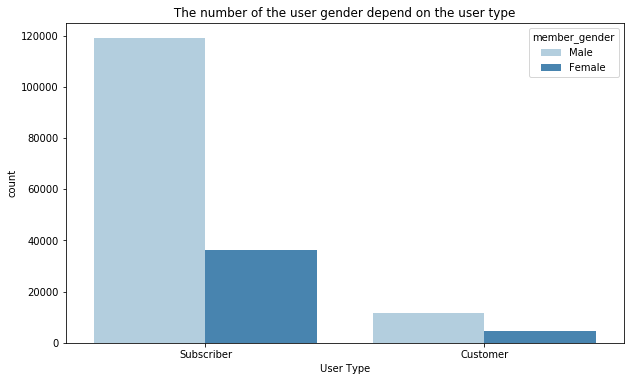

In [21]:
plt.figure(figsize = [10,20]);
ax = plt.subplot(3, 1, 3);

sb.countplot(data = df, x = "user_type", hue = 'member_gender',order=df.user_type.value_counts().index,
             palette = 'Blues');
plt.xlabel('User Type');
plt.title(" The number of the user gender depend on the user type ");
plt.show();

## What types of the user finish the trip faster depend on their gender and user type?
> The chart shows that female customers go on longer distance than the subscriber so that mean the subscriber faster 

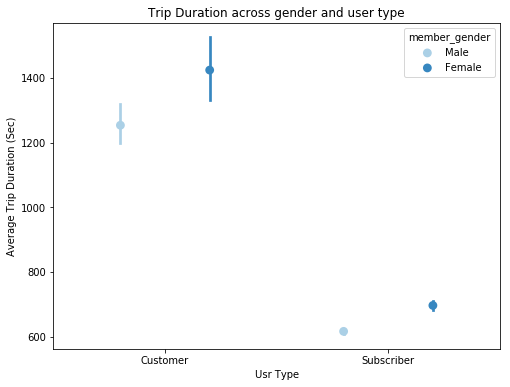

In [22]:
fig = plt.figure(figsize = [8,6]);
ax = sb.pointplot(data = df, x ='user_type', y = 'duration_sec', hue = 'member_gender',
           palette = 'Blues', linestyles = '', dodge = 0.4);
plt.title('Trip Duration across gender and user type');
plt.xlabel('Usr Type');
plt.ylabel('Average Trip Duration (Sec)');
ax.set_yticklabels([],minor = True);
plt.show();

## Whish month most of the user start their travel?

> The chart show interesting information which is most of the traveler start their travel at February

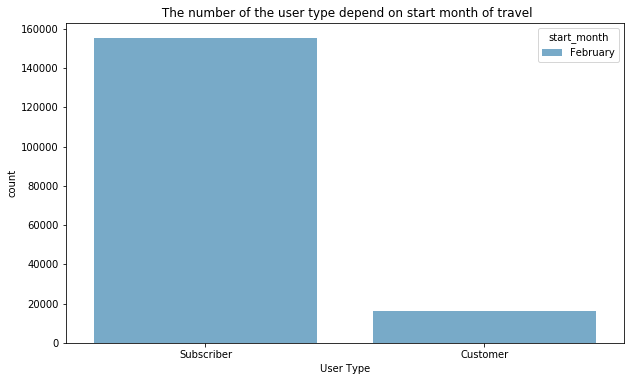

In [23]:
plt.figure(figsize = [10,20]);
ax = plt.subplot(3, 1, 3);

sb.countplot(data = df, x = "user_type", hue = 'start_month',order=df.user_type.value_counts().index,
             palette = 'Blues');
plt.xlabel('User Type');
plt.title(" The number of the user type depend on start month of travel");
plt.show();

## Finally 

### The analysis shows that GoBike is more useful for customers which are most of them tourists, and they go on longer trips in my opinion enjoy the traveling 

In [24]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 369640 bytes to Part_II_slide_deck_template.slides.html
